# Laufzeiten des Simplex-Algorithmus

In [19]:
import numpy as np
import mip
import time
import seaborn as sns
sns.set()
import matplotlib.pylab as plt

In [29]:
def rnd_LP(m,n):
    """
    LP mit normalverteilter Matrix A, b,c=1
    """
    A=np.random.randn(m,n)
    b=np.ones(m)
    c=np.ones(n)
    return A,b,c

def run(A,b,c):
    """
    erstelle LP und löse es
    """
    M=mip.Model()
    x=[M.add_var() for _ in c]
    for Ai,bi in zip(A,b):
        M+=mip.xsum(a*xx for a,xx in zip(Ai,x)) <= bi
    M.objective=mip.maximize(mip.xsum(cc*xx for cc,xx in zip(c,x)))
    M.optimize()
    
def get_runtime(M,N,repeats=10):
    """
    messe Laufzeiten mit Zufalls-LP mit m Ungleichungen und n Variablen,
    jeweils repeats oft wiederholt (für statistische Stabilität)
    zurückgegeben wird eine Liste der Durchschnitte der Laufzeiten 
    """
    times=[]
    for m,n in zip(M,N):
        start=time.time()
        for _ in range(repeats):
            A,b,c=rnd_LP(m,n)
            run(A,b,c)
        end=time.time()
        times.append((end-start)/repeats)
    return times


In [ ]:
N=range(100,2001,100)
M=[20]*len(N)
T=get_runtime(M,N)

In [ ]:
N2=np.arange(100,1001,50,dtype='int16')
M2=(N2/10).astype('int16')
T2=get_runtime(M2,N2)

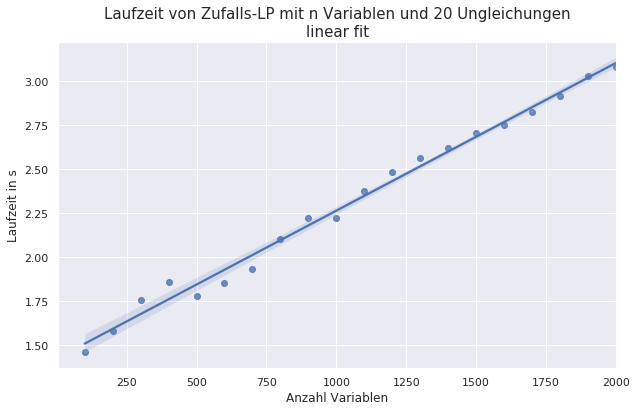

In [48]:
plt.figure(figsize=(10,6))
sns.regplot(x=N,y=T)
plt.xlabel('Anzahl Variablen')
plt.ylabel('Laufzeit in s')
plt.title('Laufzeit von Zufalls-LP mit n Variablen und 20 Ungleichungen\nlinear fit',fontsize=15)
plt.show()

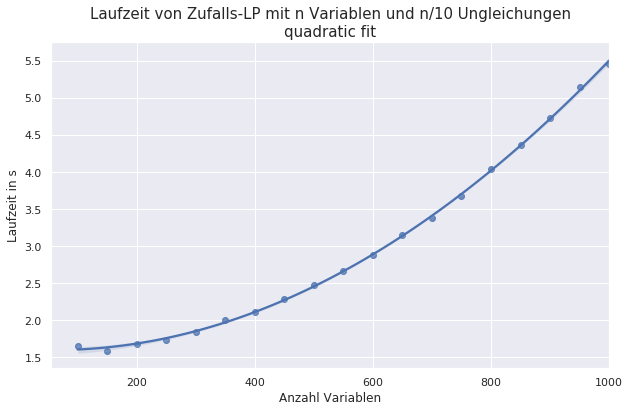

In [49]:
plt.figure(figsize=(10,6))
sns.regplot(x=N2,y=T2,order=2)
plt.xlabel('Anzahl Variablen')
plt.ylabel('Laufzeit in s')
plt.title('Laufzeit von Zufalls-LP mit n Variablen und n/10 Ungleichungen\nquadratic fit',fontsize=15)
plt.show()